In [ ]:
import pandas as pd
import numpy as np

# Load dataset
url = "https://teammindshift.com/data/iris.csv"

df = pd.read_csv(url)

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['species'] = LE.fit_transform(df['species'])

print(df)

# 0 - Setosa
# 1 - Versicolor
# 2 - Virgina

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


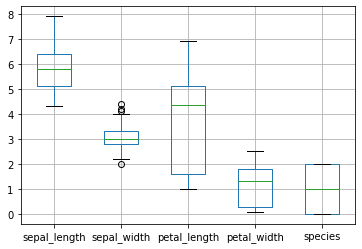

In [ ]:
df.boxplot()

In [ ]:
# import sklearn model_selection code
from sklearn import model_selection

# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]

# Get Training and Validation sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))

print("2. Confusion Matrix:\n{}".format(pd.crosstab(Y_validation, predictions, rownames=['True'], colnames=['Predicted'], margins=True)))

1. Accuracy: 0.8666666666666667
2. Confusion Matrix:
Predicted  0.0  1.0  2.0  All
True                         
0.0          7    0    0    7
1.0          0   10    2   12
2.0          0    2    9   11
All          7   12   11   30


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print("1. Accuracy: {}".format(accuracy_score(Y_validation, predictions)))
print("2. Confusion Matrix:\n{}".format(pd.crosstab(Y_validation, predictions, rownames=['True'], colnames=['Predicted'], margins=True)))


1. Accuracy: 0.9666666666666667
2. Confusion Matrix:
Predicted  0.0  1.0  2.0  All
True                         
0.0          7    0    0    7
1.0          0   11    1   12
2.0          0    0   11   11
All          7   11   12   30
